We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\Healthcare_Insurance_fork\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\Healthcare_Insurance_fork'

DOWNLOAD FROM KAGGLE

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
!chmod 600 kaggle.json

In [6]:
#KaggleDatasetPath = "willianoliveiragibin/healthcare-insurance"
DestinationFolder = "dataset/raw"

In [7]:
print(DestinationFolder)

dataset/raw


In [9]:
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance
License(s): CC0-1.0


In [10]:
import os
import zipfile
import glob

zip_files = glob.glob(os.path.join(DestinationFolder, "*.zip"))
print(zip_files)

for zip_file in zip_files:
    print('zip_file')
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(DestinationFolder)  # Extract here
    os.remove(zip_file)  # Remove the ZIP file after extraction

print("Extraction complete.")
#read csv file

['dataset/raw/healthcare-insurance.zip']
zip_file
Extraction complete.


In [8]:
import pandas as pd
df = pd.read_csv(f'{DestinationFolder}/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
#check object types and memory details of the collumn values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#check the dataframe shape
df.shape

(1338, 7)

In [12]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [13]:
#remove the duplicate row
df.drop(index = 581, inplace = True)

In [14]:
print(duplicates)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [15]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [16]:
#check if values in dataframe is having null values
df.isnull()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [18]:
# Define the labels
labels = ['10', '20', '30', '40', '50']

In [19]:
#Discretize bmi collumn to BMI_Range collumn with bmi Bins

df['BMI_Range'] = pd.qcut(df['bmi'], q=5, labels=labels)


In [20]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range
0,19,female,27.900,0,yes,southwest,16884.92400,20
1,18,male,33.770,1,no,southeast,1725.55230,40
2,28,male,33.000,3,no,southeast,4449.46200,40
3,33,male,22.705,0,no,northwest,21984.47061,10
4,32,male,28.880,0,no,northwest,3866.85520,30
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30
1334,18,female,31.920,0,no,northeast,2205.98080,30
1335,18,female,36.850,0,no,southeast,1629.83350,50
1336,21,female,25.800,0,no,southwest,2007.94500,20


In [21]:
# Encode to 0 and 1 for the collumn 'sex'
df['IsSex'] = df['sex'].map({'male': 0, 'female': 1})

print(df)

      age     sex     bmi  children smoker     region      charges BMI_Range  \
0      19  female  27.900         0    yes  southwest  16884.92400        20   
1      18    male  33.770         1     no  southeast   1725.55230        40   
2      28    male  33.000         3     no  southeast   4449.46200        40   
3      33    male  22.705         0     no  northwest  21984.47061        10   
4      32    male  28.880         0     no  northwest   3866.85520        30   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830        30   
1334   18  female  31.920         0     no  northeast   2205.98080        30   
1335   18  female  36.850         0     no  southeast   1629.83350        50   
1336   21  female  25.800         0     no  southwest   2007.94500        20   
1337   61  female  29.070         0    yes  northwest  29141.36030        30   

      IsSex  
0         1  
1         0

In [22]:
# Encode to 0 and 1 for the collumn 'smoker'
df['IsSmoker'] = df['smoker'].map({'no': 0, 'yes': 1})

print(df)

      age     sex     bmi  children smoker     region      charges BMI_Range  \
0      19  female  27.900         0    yes  southwest  16884.92400        20   
1      18    male  33.770         1     no  southeast   1725.55230        40   
2      28    male  33.000         3     no  southeast   4449.46200        40   
3      33    male  22.705         0     no  northwest  21984.47061        10   
4      32    male  28.880         0     no  northwest   3866.85520        30   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830        30   
1334   18  female  31.920         0     no  northeast   2205.98080        30   
1335   18  female  36.850         0     no  southeast   1629.83350        50   
1336   21  female  25.800         0     no  southwest   2007.94500        20   
1337   61  female  29.070         0    yes  northwest  29141.36030        30   

      IsSex  IsSmoker  
0         1    

In [23]:
# Encode Region to index 
# northwest : 1
# southwest : 2
# northeast : 3
# southeast : 4

replace = {"northwest" :1, "southwest" : 2, "northeast" : 3, "southeast" : 4}

df['Region_Index'] = df['region'].replace(replace)


In [24]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range,IsSex,IsSmoker,Region_Index
0,19,female,27.900,0,yes,southwest,16884.92400,20,1,1,2
1,18,male,33.770,1,no,southeast,1725.55230,40,0,0,4
2,28,male,33.000,3,no,southeast,4449.46200,40,0,0,4
3,33,male,22.705,0,no,northwest,21984.47061,10,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,30,1,0,3
1335,18,female,36.850,0,no,southeast,1629.83350,50,1,0,4
1336,21,female,25.800,0,no,southwest,2007.94500,20,1,0,2


In [25]:
#Define the labels for age collumn
labels_age = ['10', '20', '30', '40', '50', '60']

In [26]:
#Discretize "age" collumn to "AGE_Range" collumn with age Bins

df['AGE_Range'] = pd.qcut(df['age'], q=6, labels=labels_age)

In [27]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range,IsSex,IsSmoker,Region_Index,AGE_Range
0,19,female,27.900,0,yes,southwest,16884.92400,20,1,1,2,10
1,18,male,33.770,1,no,southeast,1725.55230,40,0,0,4,10
2,28,male,33.000,3,no,southeast,4449.46200,40,0,0,4,20
3,33,male,22.705,0,no,northwest,21984.47061,10,0,0,1,30
4,32,male,28.880,0,no,northwest,3866.85520,30,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30,0,0,1,50
1334,18,female,31.920,0,no,northeast,2205.98080,30,1,0,3,10
1335,18,female,36.850,0,no,southeast,1629.83350,50,1,0,4,10
1336,21,female,25.800,0,no,southwest,2007.94500,20,1,0,2,10


<Figure size 1000x700 with 0 Axes>

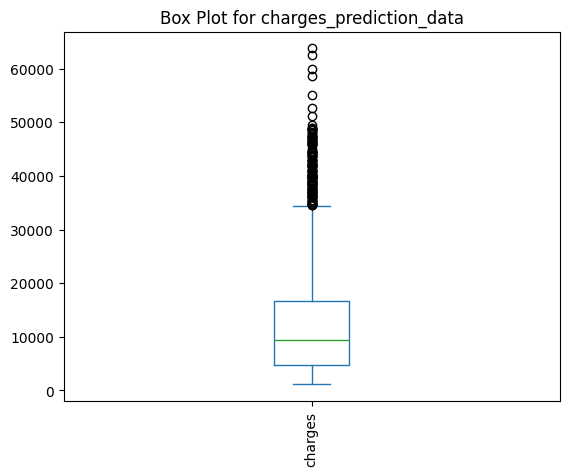

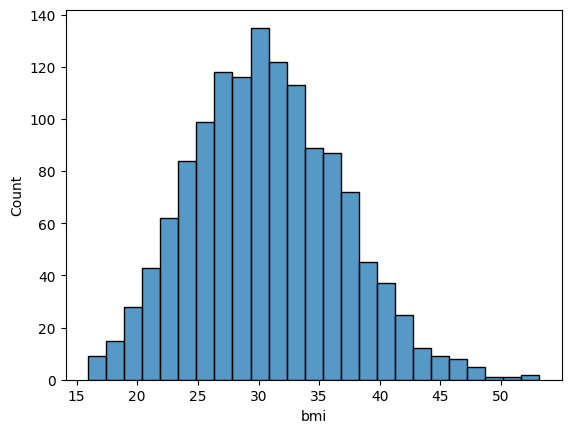

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot for 'charges' to visualise outliers
plt.figure(figsize=(10, 7))
df.plot(kind='box', y=['charges'], rot=90)
plt.title('Box Plot for charges_prediction_data')
plt.show()
sns.histplot(df, x=df['bmi'])
plt.show()


In [29]:
# we are keeping the outliers in the charges collumn because they are relevant for our analysis
# The higher insurance charges are related to being smoker, high bmi, old age. so these factors are correlated.
high_values = df[df['charges'] > 50000]
#print(high_values)
print(high_values.head(50))

      age     sex     bmi  children smoker     region      charges BMI_Range  \
34     28    male  36.400         1    yes  southwest  51194.55914        50   
543    54  female  47.410         0    yes  southeast  63770.42801        50   
577    31  female  38.095         1    yes  northeast  58571.07448        50   
819    33  female  35.530         0    yes  northwest  55135.40209        40   
1146   60    male  32.800         0    yes  southwest  52590.82939        40   
1230   52    male  34.485         3    yes  northwest  60021.39897        40   
1300   45    male  30.360         0    yes  southeast  62592.87309        30   

      IsSex  IsSmoker  Region_Index AGE_Range  
34        0         1             2        20  
543       1         1             4        50  
577       1         1             3        20  
819       1         1             1        30  
1146      0         1             2        60  
1230      0         1             1        50  
1300      0         1  

In [ ]:
#df.to_csv(f'dataset/cleaned/insurance_cleaned.csv', index=False)

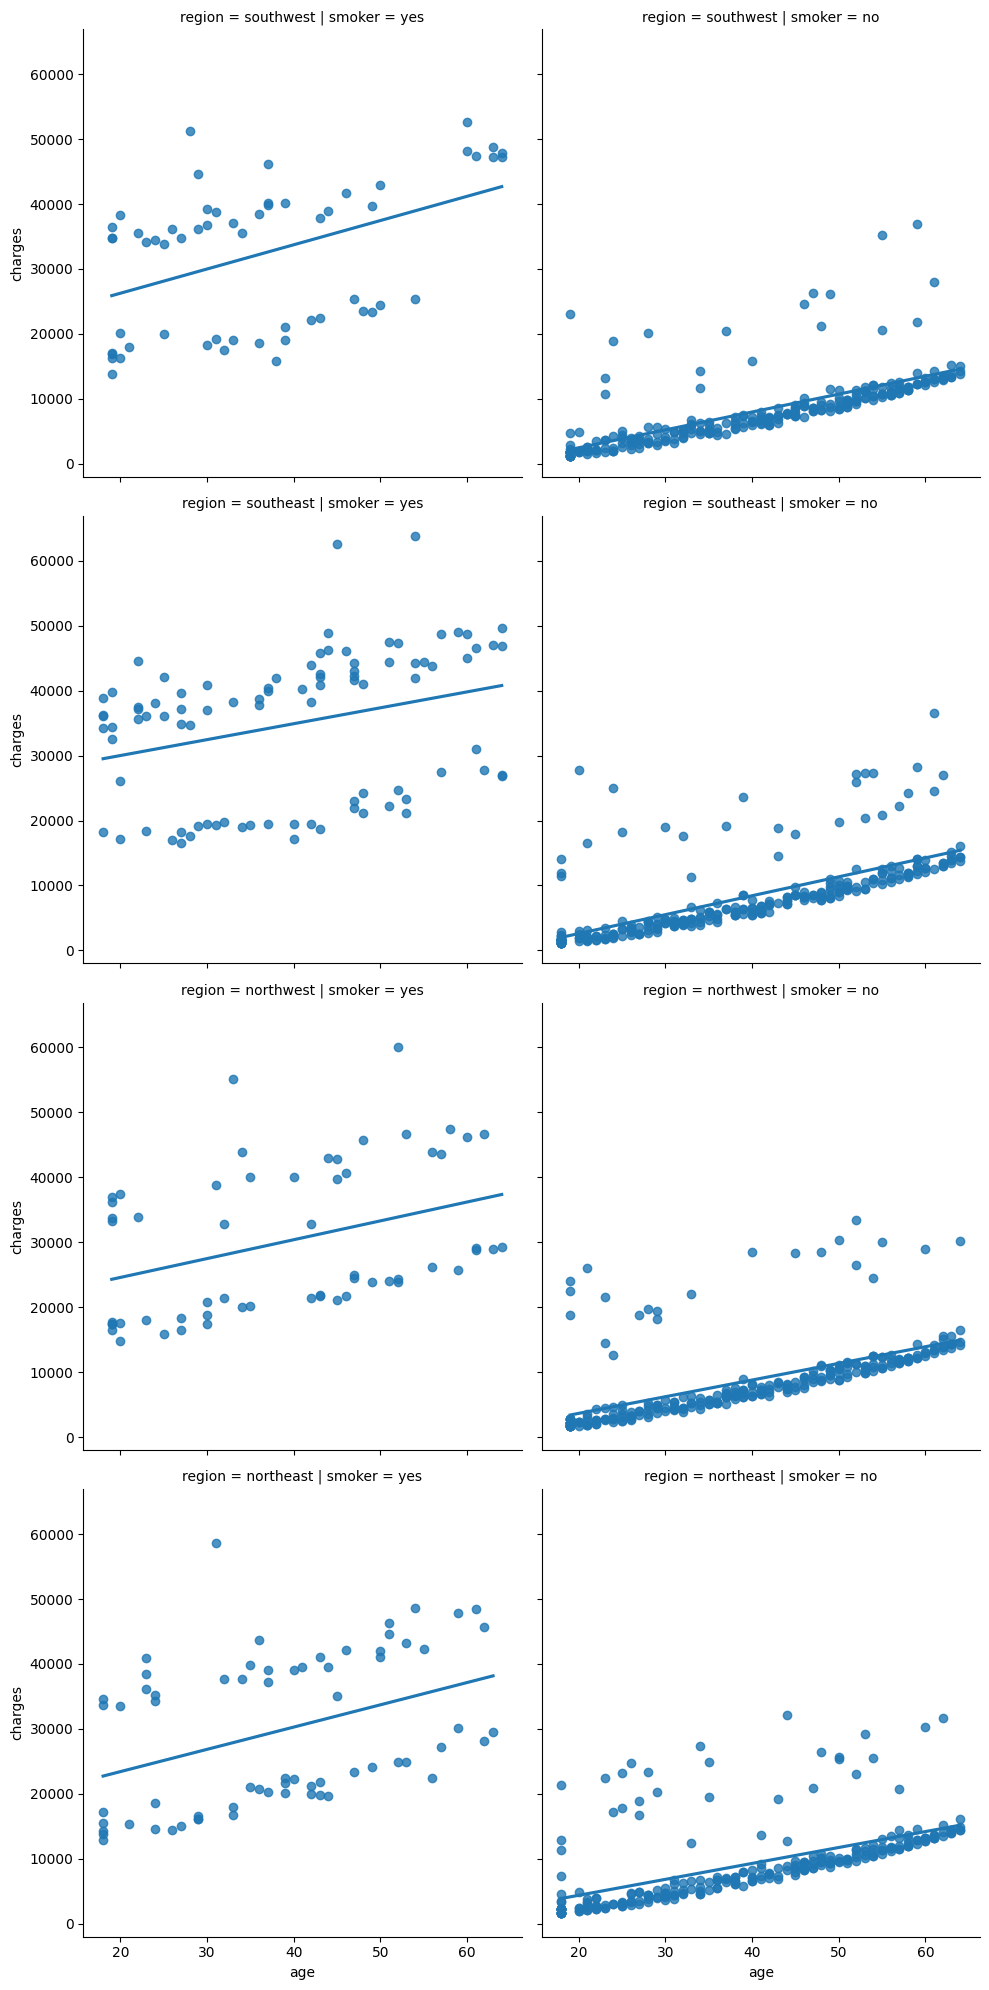

In [ ]:
#LM plot for charges according to age,smoker, region
sns.lmplot(data=df, x='age', y='charges', col='smoker', row='region', ci=None)
plt.show()

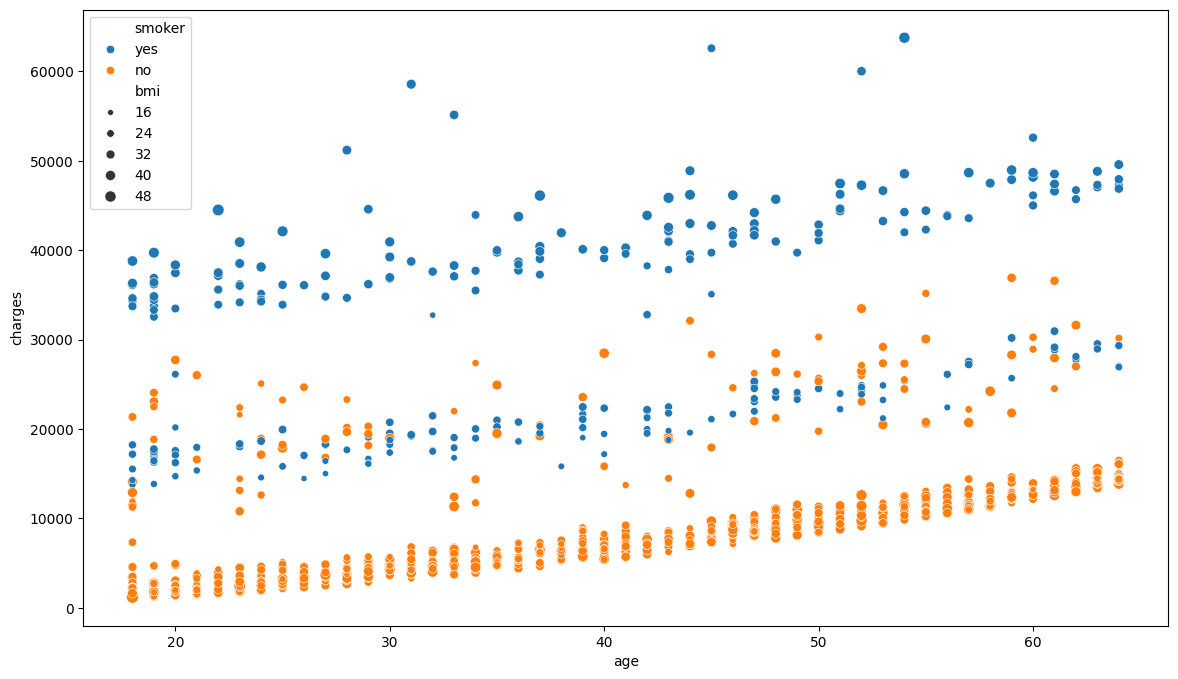

In [ ]:
# Scatter plot for charges according to age,smoker, region, bmi
fig, axes = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x='age', y='charges',
                hue='smoker',
                size='bmi')
plt.show()

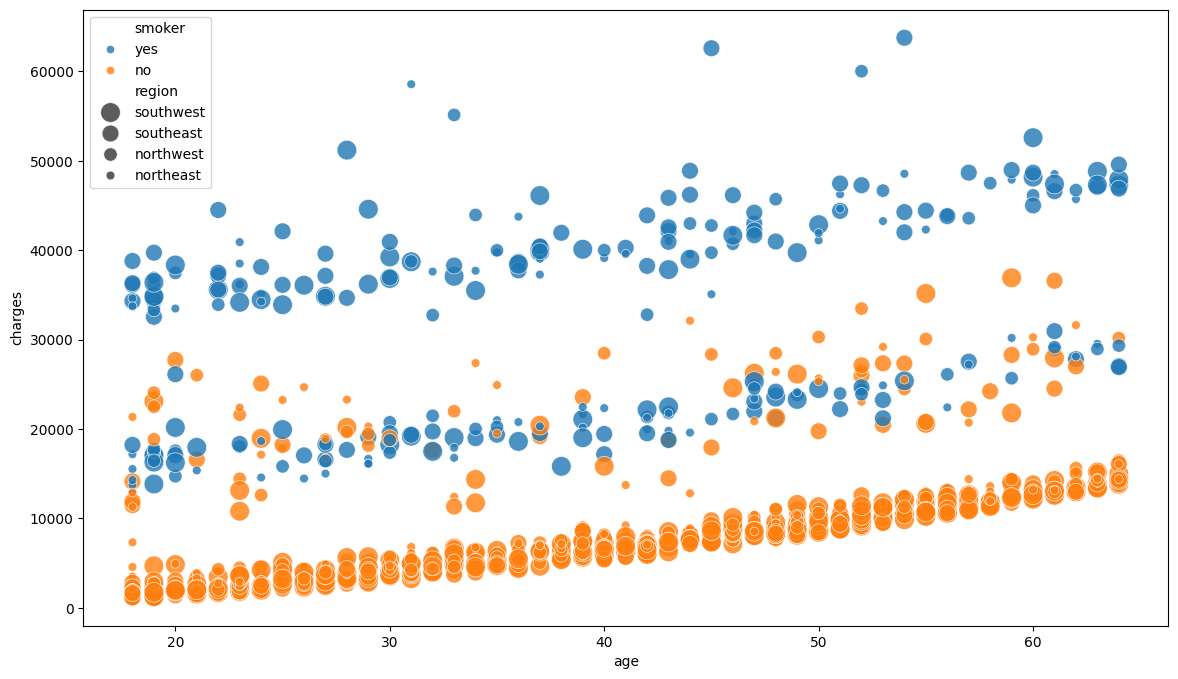

In [ ]:
#scatter plot for charges according to age,smoker, size as a region
fig, axes = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x='age', y='charges',
                hue='smoker',
                size='region', sizes=(40, 200),
                alpha=0.8)
plt.show()

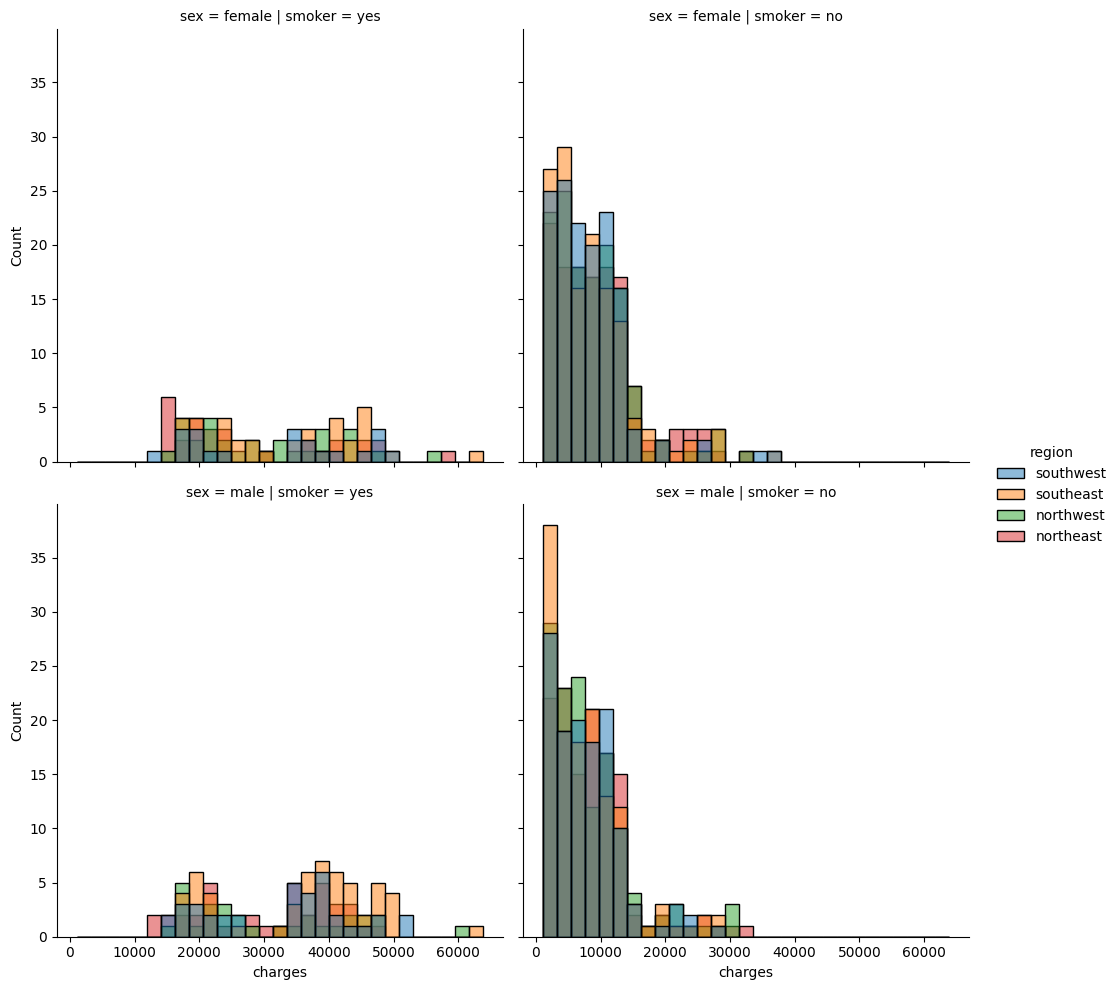

In [ ]:
#displot for charges according to age,smoker, region
sns.displot(df, x="charges", col="smoker", row="sex", hue='region')
plt.show()

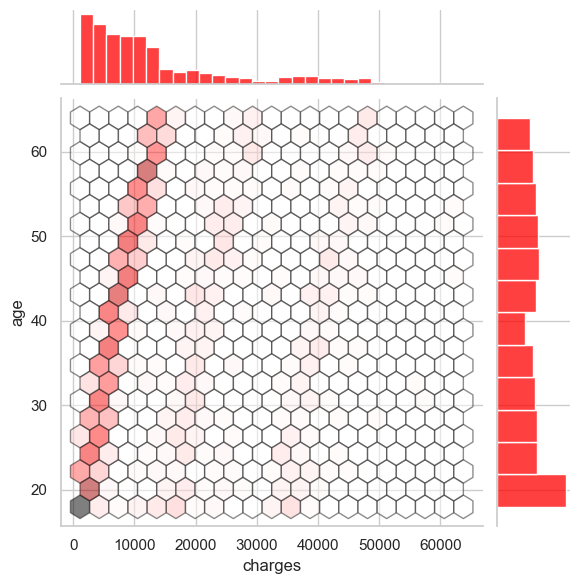

In [ ]:
#jointplot for charges according to age,smoker, region
sns.jointplot(data=df, x='charges', y='age', kind='hex', color='red', alpha=0.5, edgecolor='k')
plt.show()

In [37]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range,IsSex,IsSmoker,Region_Index,AGE_Range
0,19,female,27.900,0,yes,southwest,16884.92400,20,1,1,2,10
1,18,male,33.770,1,no,southeast,1725.55230,40,0,0,4,10
2,28,male,33.000,3,no,southeast,4449.46200,40,0,0,4,20
3,33,male,22.705,0,no,northwest,21984.47061,10,0,0,1,30
4,32,male,28.880,0,no,northwest,3866.85520,30,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30,0,0,1,50
1334,18,female,31.920,0,no,northeast,2205.98080,30,1,0,3,10
1335,18,female,36.850,0,no,southeast,1629.83350,50,1,0,4,10
1336,21,female,25.800,0,no,southwest,2007.94500,20,1,0,2,10


In [38]:
df_sub = df[['age', 'bmi', 'children', 'charges', 'IsSex', 'IsSmoker', 'Region_Index', 'BMI_Range', 'AGE_Range']]
df_sub

,age,bmi,children,charges,IsSex,IsSmoker,Region_Index,BMI_Range,AGE_Range
0,19,27.900,0,16884.92400,1,1,2,20,10
1,18,33.770,1,1725.55230,0,0,4,40,10
2,28,33.000,3,4449.46200,0,0,4,40,20
3,33,22.705,0,21984.47061,0,0,1,10,30
4,32,28.880,0,3866.85520,0,0,1,30,30
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,1,30,50
1334,18,31.920,0,2205.98080,1,0,3,30,10
1335,18,36.850,0,1629.83350,1,0,4,50,10
1336,21,25.800,0,2007.94500,1,0,2,20,10


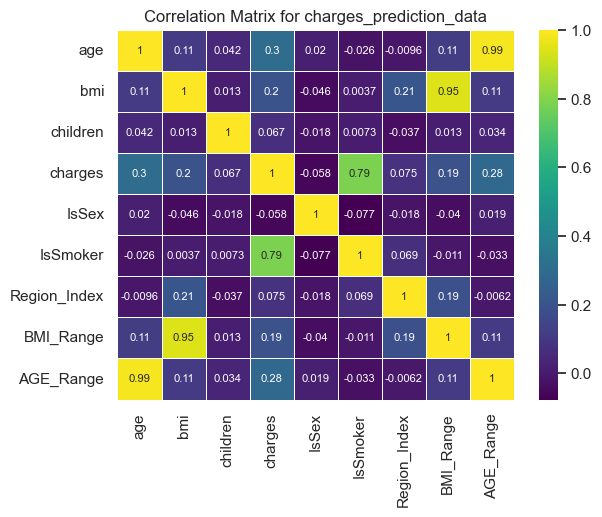

In [45]:
#heatmap for correlation matrix
sns.set_theme(style="whitegrid")
df_corr = df_sub.corr()
sns.heatmap(data=df_corr, annot=True, linewidths=0.5, annot_kws={"size": 8},cmap='viridis')
plt.title('Correlation Matrix for charges_prediction_data')
plt.show()

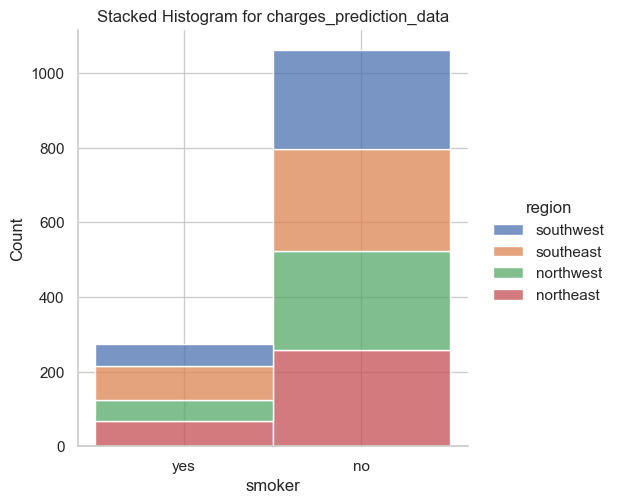

In [ ]:
#displot for charges according to smoker vs region
sns.displot(df, x='smoker', hue='region', multiple='stack')
plt.title('Stacked Histogram for charges_prediction_data')
plt.show()

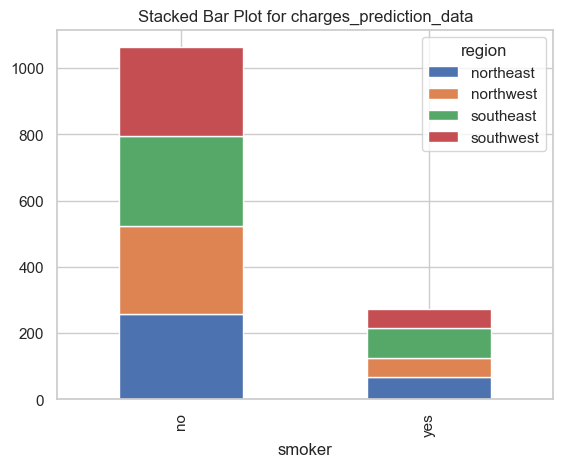

In [ ]:
#bar plot for charges according to smoker vs region
df.groupby(by=['smoker', 'region']).size().unstack().plot(kind='bar',
                                                       stacked=True)
plt.title('Stacked Bar Plot for charges_prediction_data')
plt.show()

In [41]:
# Define BMI categories using apply and lambda and using discretisation and binning the bmi categories
df["BMI_Category"] = df["bmi"].apply(lambda x: 
                                     "Underweight" if x < 18.5 else 
                                     "Normal weight" if x < 25 else 
                                     "Overweight" if x < 30 else 
                                     "Obese")

# Print the DataFrame
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

       BMI_Category      lat       lon    avg_bmi   avg_charges  
0        Overweight  34.0489 -111.0937  30.663397  13270.422265  
1             Obese  33.749

In [42]:
import plotly.express as px
USA_coords = {
    'northwest': [47.6062, -120.7401],
    'southwest': [34.0489, -111.0937],
    'northeast': [41.2033, -74.0060],
    'southeast': [33.7490, -84.3880]
    }

# Add latitude and longitude columns
df['lat'] = df['region'].map(lambda c: USA_coords[c][0])
df['lon'] = df['region'].map(lambda c: USA_coords[c][1])
df['avg_bmi'] = df['bmi'].mean()
df['avg_charges'] = df['charges'].mean()

# Plot
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    size='avg_charges',
    color='region',
    hover_name='region',
    hover_data={'avg_charges': True, 'lat': False, 'lon': False, 'region': True, 'smoker': False, 'avg_bmi': False},
    zoom=3,
    size_max=50,
    title='Map of Regions of USA',
    mapbox_style='carto-positron'
)

fig.show()

In [ ]:
fig.write_html("dataset/cleaned/GeographicalMap.html")

In [44]:
#Mann–Whitney U test
#Are charges different between smokers and non-smokers?

from scipy.stats import mannwhitneyu

# Split charges into two groups based on smoker status
charges_smokers = df[df['smoker'] == 'yes']['charges']
charges_nonsmokers = df[df['smoker'] == 'no']['charges']

# Perform Mann–Whitney U test (non-parametric)
stat, p = mannwhitneyu(charges_smokers, charges_nonsmokers, alternative='two-sided')

# Output results
print(f"Mann–Whitney U statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Result: Significant difference in charges between smokers and non-smokers.")
else:
    print("Result: No significant difference in charges between smokers and non-smokers.")

Mann–Whitney U statistic: 284133.0
P-value: 5.27023344450357e-130
Result: Significant difference in charges between smokers and non-smokers.


In [45]:
#Independent t-test Code (Male vs Female charges):

from scipy.stats import ttest_ind

# Split data into two groups
charges_male = df[df['sex'] == 'male']['charges']
charges_female = df[df['sex'] == 'female']['charges']

# Perform Independent t-test
stat, p = ttest_ind(charges_male, charges_female, equal_var=False)  # Welch’s t-test recommended if variances differ

# Output results
print(f"t-statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Result: Significant difference in charges between males and females.")
else:
    print("Result: No significant difference in charges between males and females.")

t-statistic: 2.1008878232359565
P-value: 0.03584101495601664
Result: Significant difference in charges between males and females.


In [46]:
#Kruskal–Wallis Test Code (Charges by Region):

from scipy.stats import kruskal

# Group charges by region
charges_northeast = df[df['region'] == 'northeast']['charges']
charges_northwest = df[df['region'] == 'northwest']['charges']
charges_southeast = df[df['region'] == 'southeast']['charges']
charges_southwest = df[df['region'] == 'southwest']['charges']

# Perform Kruskal–Wallis H test (non-parametric ANOVA)
stat, p = kruskal(charges_northeast, charges_northwest, charges_southeast, charges_southwest)

# Output results
print(f"Kruskal_Wallis H statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Result: Significant difference in charges between regions.")
else:
    print("Result: No significant difference in charges between regions.")#

Kruskal_Wallis H statistic: 4.734181215658743
P-value: 0.19232908072121044
Result: No significant difference in charges between regions.


In [47]:
#Chi-square test - to test association between categorical variables (sex and smoker status)
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nResult: Significant association between sex and smoker status.")
else:
    print("\nResult: No significant association between sex and smoker status.")

Contingency Table:
smoker   no  yes
sex             
female  547  115
male    517  159

Chi-square Statistic: 7.39291081459996
P-value: 0.0065481435035807025
Degrees of Freedom: 1
Expected Frequencies:
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]

Result: Significant association between sex and smoker status.
